                             CRSS 2018 accident data file analysis
Objective
 1) traffic accident statistics of CRSS 2018 data file
 2) creating a model to see if number of injury can be predicted from different condition (Roadway, environment, person condition)


In [1]:
#imporint packages

import numpy as np
import pandas as pd
import sklearn

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import preprocessing 
import sklearn.feature_selection

import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from statsmodels.discrete.discrete_model import Logit

import matplotlib.pyplot as plt
%matplotlib  inline
import seaborn as sns; sns.set(color_codes=True)

# load in packages/libraries

import warnings
warnings.filterwarnings('ignore') 

import math

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score


In [2]:
#importing data
df= pd.read_csv ('ACCIDENT.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,...,48433,48434,48435,48436,48437,48438,48439,48440,48441,48442
CASENUM,2.018000e+11,2.018000e+11,2.018000e+11,2.018000e+11,2.018000e+11,2.018000e+11,2.018000e+11,2.018000e+11,2.018000e+11,2.018000e+11,...,2.018010e+11,2.018010e+11,2.018010e+11,2.018010e+11,2.018010e+11,2.018010e+11,2.018010e+11,2.018010e+11,2.018010e+11,2.018010e+11
REGION,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
PSU,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,6.400000e+01,5.600000e+01,6.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,...,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
PJ,2.080000e+02,2.140000e+02,2.140000e+02,2.090000e+02,3.060000e+02,1.890000e+02,2.950000e+02,9.100000e+01,8.500000e+01,9.100000e+01,...,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02
PSU_VAR,2.080000e+02,2.140000e+02,2.140000e+02,2.090000e+02,6.400000e+01,1.890000e+02,6.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,...,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
URBANICITY,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
STRATUM,9.000000e+00,7.000000e+00,6.000000e+00,1.000000e+01,6.000000e+00,1.000000e+01,6.000000e+00,9.000000e+00,1.000000e+01,1.000000e+01,...,3.000000e+00,2.000000e+00,4.000000e+00,6.000000e+00,6.000000e+00,9.000000e+00,8.000000e+00,6.000000e+00,4.000000e+00,1.000000e+01
VE_TOTAL,4.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,...,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
VE_FORMS,4.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,...,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00
PVH_INVL,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [3]:
df.shape  #This data has 48443 rows and 51 columns. 

(48443, 51)

In [4]:
df.columns

Index(['CASENUM', 'REGION', 'PSU', 'PJ', 'PSU_VAR', 'URBANICITY', 'STRATUM',
       'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS', 'PERMVIT', 'PERNOTMVIT',
       'NUM_INJ', 'MONTH', 'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'HARM_EV',
       'ALCOHOL', 'MAX_SEV', 'MAN_COLL', 'RELJCT1', 'RELJCT2', 'TYP_INT',
       'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'WEATHER2', 'WEATHER',
       'SCH_BUS', 'INT_HWY', 'CF1', 'CF2', 'CF3', 'WKDY_IM', 'HOUR_IM',
       'MINUTE_IM', 'EVENT1_IM', 'MANCOL_IM', 'RELJCT1_IM', 'RELJCT2_IM',
       'LGTCON_IM', 'WEATHR_IM', 'MAXSEV_IM', 'NO_INJ_IM', 'ALCHL_IM',
       'PSUSTRAT', 'WEIGHT'],
      dtype='object')

# information about column names
PEDS: Number of Persons Not in Motor Vehicles

PERNOTMVIT: Number of Persons Not in Motor Vehicles in Transport (MVIT)

VE_TOTAL: Number of Total Motor Vehicles

VE_FORMS: Number of Motor Vehicles in Transport (MVIT)

PVH_INVL: Number of Parked/Working Vehicles

PERMVIT: Number of Persons in Motor Vehicles in Transport (MVIT)

MONTH: Month of Crash

DAY_WEEK: Day of Week

WKDY_IM: Imputed Day of Week

YEAR: Year of Crash

HOUR: Hour of Crash

HOUR_IM: Imputed Hour of Crash

MINUTE: Minute of Crash

HARM_EV: First Harmful Event

MAN_COLL: Manner of Collision

RELJCT1: Relation to Junction- Within Interchange Area

RELJCT2: Relation to Junction- Specific Location

TYP_INT: Type of Intersection

REL_ROAD: Relation to Trafficway

WRK_ZONE: work Zone

LGT_COND: Light Condition

WEATHER , WEATHER1 , WEATHER2: Atmospheric Conditions 

CH_BUS: School Bus Related

CF1, CF2, CF3: Related Factors- Crash Level

INT_HWY: Interstate Highway

MAX_SEV: Maximum Injury Severity in Crash

NUM_INJ: Number Injured in Crash

ALCOHOL: Alcohol Involved in Crash









                Objective 1: Basic Statistics and informative graphs from the data

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CASENUM,48443.0,2.018009e+11,267277.179218,2.018000e+11,2.018010e+11,2.018010e+11,2.018010e+11,2.018010e+11
REGION,48443.0,2.713436e+00,0.906444,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
PSU,48443.0,4.803631e+01,19.678810,1.000000e+01,3.200000e+01,4.800000e+01,6.400000e+01,8.300000e+01
PJ,48443.0,1.385061e+03,1064.697585,4.500000e+01,4.560000e+02,1.098000e+03,2.091000e+03,4.125000e+03
PSU_VAR,48443.0,5.241698e+01,33.159322,1.000000e+01,3.200000e+01,4.800000e+01,6.600000e+01,2.140000e+02
URBANICITY,48443.0,1.218174e+00,0.413010,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
STRATUM,48443.0,7.296431e+00,2.508255,2.000000e+00,6.000000e+00,8.000000e+00,9.000000e+00,1.000000e+01
VE_TOTAL,48443.0,1.830646e+00,0.648344,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.500000e+01
VE_FORMS,48443.0,1.777450e+00,0.644722,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.500000e+01
PVH_INVL,48443.0,5.319654e-02,0.275018,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01


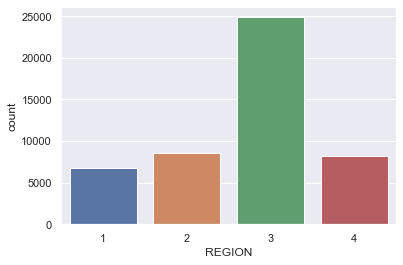

In [6]:
df['REGION'].unique()  #It means this whole data has 4 regions and they divided it into 1, 2, 3, 4
sns.countplot(df['REGION'])

#1 Northeast (PA, NJ, NY, NH, VT, RI, MA, ME, CT),
#2 Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, IA, MO, KS),
#3 South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA, FL, AL, MS, LA, AR, OK, TX),
#4 West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, WY, AK, HI)


The graph above (No of accident vs Region) telling us that Region 3 has the highest number of accident incidents which includes South part of USA (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA, FL, AL, MS, LA, AR, OK, TX)

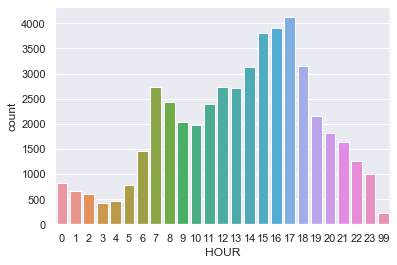

In [7]:
df.HOUR.value_counts() #at 5PM we had highest number of accident incident whereas at 3 AM in the morning had the lowest
 
sns.countplot(df['HOUR'])

#99 is unknown values


Maximum number of accidents happened between 5 to 7 PM of the day. Question would be number of injury due to this accident incident follows the same trend?

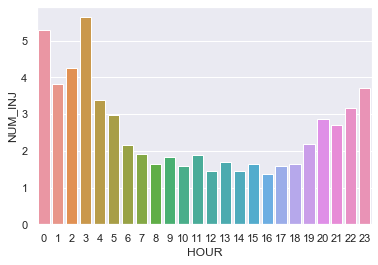

In [8]:
#Traffic Crashes and Injuries by Hour of the Day

ax = sns.barplot(x="HOUR", y="NUM_INJ", ci= None, data=df[df.HOUR<=24])  
#Number of injury vs Hour of the day

The graph between number of injury at different hours of the day is showing opposite trend of no of accident at different time of the day. At 1-3 am in the morning and 9 to 11 PM number of injured people due to the accidents had the highest numbers. Similar trend was also found in the number of maximum severity cases at different time of the day graphs (below)

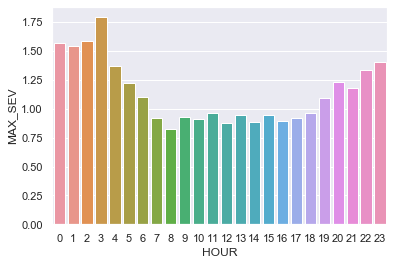

In [9]:
##Traffic Crashes and Injuries by Hour of the Day
#Number of maximum severity vs Hour of the day

ax = sns.barplot(x="HOUR", y="MAX_SEV", ci = None, data=df[df.HOUR<=24]) 

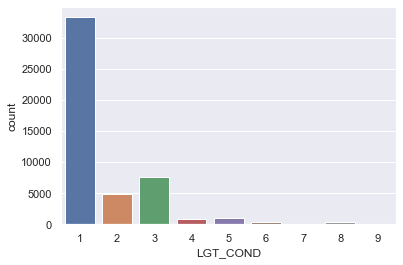

In [10]:
df.LGT_COND.value_counts() #1 is daylight. most of the incident happened during daylight
sns.countplot(df['LGT_COND'])

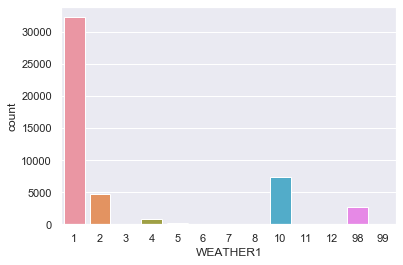

In [11]:
df.WEATHER1.value_counts()
#df.WEATHER2.value_counts() 
#df.WEATHER.value_counts()
sns.countplot(df['WEATHER1'])
#1  The weather condition was clear. 

We're seeing that number of injured people due to accidents was high during night. But the number of accident incidents was maximum during day time. This is telling us during night time the accident incidents happened are much more serious than during day time and more than 90% of the time weather condition was clear. Next question would be at night time what could be the reason of this large number of injured people? Is it due to the driver was drunk?

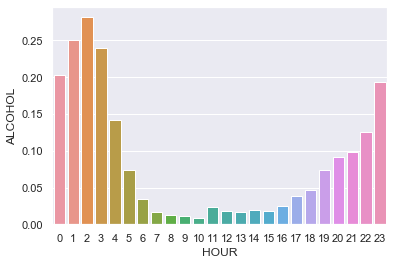

In [161]:

#Help needed.............


df.ALCOHOL.replace({2: 0, 9: 0}, inplace=True)
df.T
#sns.countplot(df['ALCOHOL'])
sns.barplot(x="HOUR", y="ALCOHOL", ci = None, data=df[df.HOUR<=24]) 
#1 alcohol involved
#0 alcohol not involved
#Need help with this coding. why 0.25????? 

The graph above telling us person who were involved in injuries was mostly drunk during driving. For this reason they couldn't take any precautions and lead into injuries.


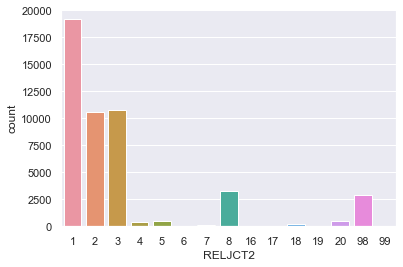

In [32]:
sns.countplot(df['RELJCT2'])

In [196]:

#df.MONTH.value_counts()   #October and November had higher number of accidents
#sns.countplot(df['MONTH'])

In [197]:
df.URBANICITY.value_counts() #1-Urbancity and 2-Rural. Most of the accident happened in urban city

1    37874
2    10569
Name: URBANICITY, dtype: int64

In [198]:
#df.DAY_WEEK.value_counts() #Friday had most of the accidents in 2018 whereas sunday had the lowest
#sns.countplot(df['DAY_WEEK'])
#1 Sunday
#2 Monday
#3 Tuesday
#4 Wednesday
#5 Thursday
#6 Friday
#7 Saturday
#9 Unknown


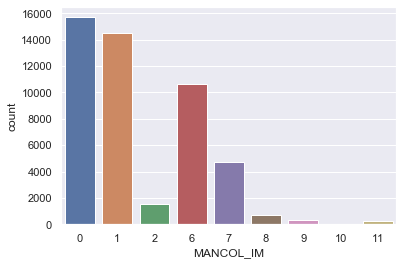

In [33]:
#df.MAN_COLL.value_counts()
sns.countplot(df['MANCOL_IM'])
#0 Not Collision with Motor Vehicle in Transport
#1 Front-to-Rear
#6 angle




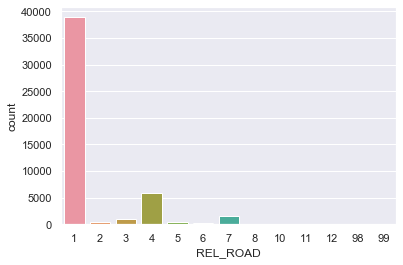

In [34]:
#df.REL_ROAD.value_counts() #This data element identifies the location of the crash as it relates to its position within or outside the trafficway based on the “First Harmful Event.”
sns.countplot(df['REL_ROAD'])
#1 on roadway
#4 on roadside

In [201]:
#sns.countplot(df['TYP_INT'])

#1 Not an Intersection 
#2 Four-Way Intersection 
#3 T-Intersection 
#4 Y-Intersection
#5 Traffic Circle 
#6  Roundabout 
#7 Five-Point, or More 
#10 L-Intersection
#98  Not Reported Unknown


In [202]:
# create a DataFrame filled with Region, Maximum Severity, Manner of collision, Type of Intersection, Relation to roadway, Light Condition, Interstate Highway
df2 = df[['NUM_INJ', 'MAX_SEV', 'TYP_INT', 'REL_ROAD', 'LGT_COND', 'INT_HWY', 'WEATHER', 'ALCOHOL', 'RELJCT2', 'HOUR']]

# drop rows in order to reduce run time
df2 = df2.drop(df2.index[6000:280000])
# reset the index
df2.reset_index(inplace = True)



(11.0, 0.0)

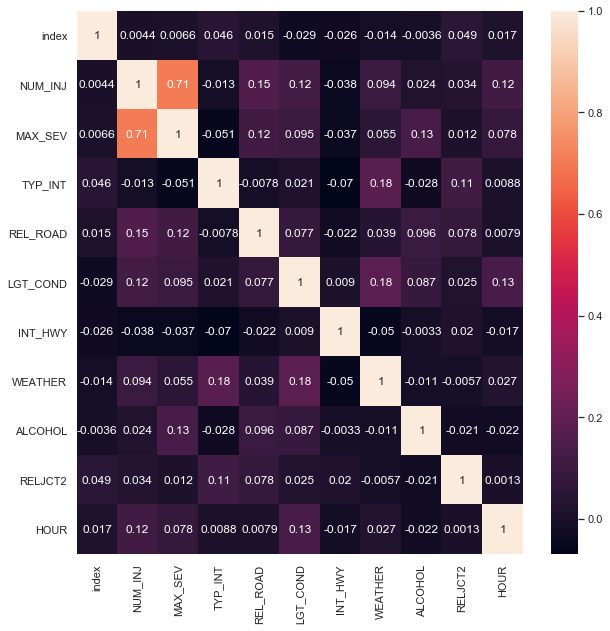

In [193]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df2.corr(), annot=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [194]:
df.corr()['NUM_INJ'].sort_values()

VE_FORMS     -0.114494
MANCOL_IM    -0.090722
PERMVIT      -0.084038
RELJCT2_IM   -0.028419
RELJCT1      -0.026518
INT_HWY      -0.025612
PERNOTMVIT   -0.025120
PEDS         -0.024973
VE_TOTAL     -0.022740
MAN_COLL     -0.020084
HOUR_IM      -0.015387
WRK_ZONE     -0.014146
WEATHR_IM    -0.013051
MINUTE_IM    -0.012863
RELJCT1_IM   -0.010362
TYP_INT      -0.010342
ALCHL_IM     -0.005548
SCH_BUS      -0.001644
CF2          -0.001208
WEATHER2     -0.000836
CF3          -0.000694
WKDY_IM      -0.000005
DAY_WEEK     -0.000005
MONTH         0.001293
CASENUM       0.002348
PJ            0.005495
CF1           0.007551
REGION        0.008160
PSUSTRAT      0.009264
RELJCT2       0.013738
PSU_VAR       0.017598
PSU           0.018060
URBANICITY    0.025018
MAXSEV_IM     0.032054
NO_INJ_IM     0.037204
LGTCON_IM     0.039898
MINUTE        0.054094
EVENT1_IM     0.061412
HARM_EV       0.063581
STRATUM       0.072883
ALCOHOL       0.082060
WEIGHT        0.098156
WEATHER       0.099133
WEATHER1   

In [205]:
model = 'NUM_INJ ~  HOUR* REL_ROAD* LGT_COND * WEATHER *ALCOHOL '
results = smf.ols(model, data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                NUM_INJ   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     225.9
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:04:46   Log-Likelihood:            -1.8668e+05
No. Observations:               48443   AIC:                         3.734e+05
Df Residuals:                   48411   BIC:                         3.737e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [26]:
#Creating model to preict an accident incident impacted by weather, light, roadway condition
#I've divided accident data into two parts. Train and Test data. 

In [27]:
df_train = pd.read_csv('ACCIDENT_TRAIN.csv', header = 0, index_col = 'CASENUM')
df_test = pd.read_csv('ACCIDENT_TEST.csv', header = 0, index_col = 'CASENUM')

# We're going to combine the two data sets for the purpose of data cleaning and feature generation.  
# However, we're going to keep track of them by labelling them "train" and "test" in the multi-index key. 
# That way I can select them later by using 'df.loc['train]' and df.loc['test'].  
# Multi-indexing is one of the most powerful features of Pandas and this is an ideal use for it. 

df = pd.concat([df_train, df_test], keys=["train", "test"])
df.columns

Index(['ALCHL_IM', 'ALCOHOL', 'CF1', 'CF2', 'CF3', 'DAY_WEEK', 'EVENT1_IM',
       'HARM_EV', 'HOUR', 'HOUR_IM', 'INT_HWY', 'LGTCON_IM', 'LGT_COND',
       'MANCOL_IM', 'MAN_COLL', 'MAXSEV_IM', 'MAX_SEV', 'MINUTE', 'MINUTE_IM',
       'MONTH', 'NO_INJ_IM', 'NUM_INJ', 'PEDS', 'PERMVIT', 'PERNOTMVIT', 'PJ',
       'PSU', 'PSUSTRAT', 'PSU_VAR', 'PVH_INVL', 'REGION', 'RELJCT1',
       'RELJCT1_IM', 'RELJCT2', 'RELJCT2_IM', 'REL_ROAD', 'SCH_BUS', 'STRATUM',
       'SURVIVED', 'TYP_INT', 'URBANICITY', 'VE_FORMS', 'VE_TOTAL', 'WEATHER',
       'WEATHER1', 'WEATHER2', 'WEATHR_IM', 'WEIGHT', 'WKDY_IM', 'WRK_ZONE',
       'YEAR'],
      dtype='object')

In [28]:
df.T

train                                                      \
CASENUM    2.020000e+11 2.020000e+11 2.020000e+11 2.020000e+11 2.020000e+11   
ALCHL_IM       2.000000     2.000000     2.000000     2.000000      2.00000   
ALCOHOL        2.000000     2.000000     2.000000     9.000000      2.00000   
CF1            0.000000     0.000000    19.000000     0.000000      0.00000   
CF2            0.000000     0.000000     0.000000     0.000000      0.00000   
CF3            0.000000     0.000000     0.000000     0.000000      0.00000   
DAY_WEEK       4.000000     3.000000     4.000000     4.000000      2.00000   
EVENT1_IM     12.000000    12.000000    12.000000    12.000000     12.00000   
HARM_EV       12.000000    12.000000    12.000000    12.000000     12.00000   
HOUR           8.000000    14.000000    17.000000    11.000000     16.00000   
HOUR_IM        8.000000    14.000000    17.000000    11.000000     16.00000   
INT_HWY        1.000000     0.000000     1.000000     0.000000      1.00000   
LGTCON_IM      1.000000     1.000000     2.000000     1.000000      1.00000   
LGT_COND       1.000000     1.000000     2.000000     1.000000      1.00000   
MANCOL_IM      1.000000     1.000000     7.000000     6.000000      7.00000   
MAN_COLL       1.000000     1.000000     7.000000     6.000000      7.00000   
MAXSEV_IM      0.000000     1.000000     1.000000     1.000000      1.00000   
MAX_SEV        0.000000     1.000000     1.000000     0.000000      1.00000   
MINUTE         0.000000    45.000000    46.000000    44.000000     25.00000   
MINUTE_IM      0.000000    45.000000    46.000000    44.000000     25.00000   
MONTH          1.000000     1.000000     1.000000     1.000000      1.00000   
NO_INJ_IM      0.000000     1.000000     2.000000     1.000000      1.00000   
NUM_INJ        0.000000     1.000000     2.000000     0.000000      1.00000   
PEDS           0.000000     0.000000     0.000000     0.000000      0.00000   
PERMVIT        4.000000     3.000000     3.000000     2.000000      3.00000   
PERNOTMVIT     0.000000     0.000000     0.000000     0.000000      0.00000   
PJ           208.000000   214.000000   214.000000   209.000000    306.00000   
PSU           56.000000    56.000000    56.000000    56.000000     64.00000   
PSUSTRAT      20.000000    20.000000    20.000000    20.000000     23.00000   
PSU_VAR      208.000000   214.000000   214.000000   209.000000     64.00000   
PVH_INVL       0.000000     0.000000     0.000000     0.000000      0.00000   
REGION         4.000000     4.000000     4.000000     4.000000      4.00000   
RELJCT1        0.000000     0.000000     0.000000     8.000000      0.00000   
RELJCT1_IM     0.000000     0.000000     0.000000     0.000000      0.00000   
RELJCT2        1.000000     1.000000     1.000000     2.000000      1.00000   
RELJCT2_IM     1.000000     1.000000     1.000000     2.000000      1.00000   
REL_ROAD       1.000000     1.000000     3.000000     1.000000      1.00000   
SCH_BUS        0.000000     0.000000     0.000000     0.000000      0.00000   
STRATUM        9.000000     7.000000     6.000000    10.000000      6.00000   
SURVIVED       1.000000     1.000000     1.000000     1.000000      0.00000   
TYP_INT        1.000000     1.000000     1.000000     2.000000      1.00000   
URBANICITY     1.000000     1.000000     1.000000     1.000000      1.00000   
VE_FORMS       4.000000     3.000000     2.000000     2.000000      2.00000   
VE_TOTAL       4.000000     3.000000     2.000000     2.000000      2.00000   
WEATHER        1.000000     1.000000     1.000000    10.000000     10.00000   
WEATHER1       1.000000     1.000000     1.000000    10.000000     10.00000   
WEATHER2       0.000000     0.000000     0.000000     0.000000      0.00000   
WEATHR_IM      1.000000     1.000000     1.000000    10.000000     10.00000   
WEIGHT       187.193308   149.787337    76.421258   265.232273     78.13454   
WKDY_IM        4.000000     3.000000     4.000000     4.000000      

In [13]:
#Ensemble Method and pipelines

# first let's read in the ACCIDENT train data
df_train2 = pd.read_csv('ACCIDENT_TRAIN.csv', header = 0)
df_test2 = pd.read_csv('ACCIDENT_TEST.csv', header = 0)
df2 = pd.concat([df_train2, df_test2], keys=["ACCIDENT_TRAIN", "ACCIDENT_TEST"])

# then we'll do a little feature engineering - wait, what is this again?

df2 = pd.get_dummies(data=df2, columns=['REGION','URBANICITY','ALCHL_IM','MAN_COLL'], drop_first=False).copy()  # make dummies for categories
df2 = df2.drop(['CASENUM','PSU','PJ','PSU_VAR','STRATUM'], axis=1).copy().dropna()  # drop the categorical columns
data2 = df2.loc['ACCIDENT_TRAIN'] 
features = data2.columns[1:]
df2

ALCOHOL  CF1  CF2  CF3  DAY_WEEK  EVENT1_IM  HARM_EV  \
ACCIDENT_TRAIN 0           2    0    0    0         4         12       12   
               1           2    0    0    0         3         12       12   
               2           2   19    0    0         4         12       12   
               3           9    0    0    0         4         12       12   
               4           2    0    0    0         2         12       12   
...                      ...  ...  ...  ...       ...        ...      ...   
               3994        2    0    0    0         1         33       33   
               3995        9    0    0    0         4         35       35   
               3996        2    0    0    0         7         33       33   
               3997        2    0    0    0         4         12       12   
               3998        2    0    0    0         7          1        1   

                     HOUR  HOUR_IM  INT_HWY  ...  MAN_COLL_1  MAN_COLL_2  \
ACCIDENT_TRAIN 0        8        8        1  ...           1           0   
               1       14       14        0  ...           1           0   
               2       17       17        1  ...           0           0   
               3       11       11        0  ...           0           0   
               4       16       16        1  ...           0           0   
...                   ...      ...      ...  ...         ...         ...   
               3994    16       16        0  ...           0           0   
               3995     8        8        0  ...           0           0   
               3996    13       13        0  ...           0           0   
               3997    15       15        0  ...           0           0   
               3998    23       23        0  ...           0           0   

                     MAN_COLL_6  MAN_COLL_7  MAN_COLL_8  MAN_COLL_9  \
ACCIDENT_TRAIN 0              0           0           0           0   
               1              0           0           0           0   
               2              0           1           0           0   
               3              1           0           0           0   
               4              0           1           0           0   
...                         ...         ...         ...         ...   
               3994           0           0           0           0   
               3995           0           0           0           0   
               3996           0           0           0           0   
               3997           1           0           0           0   
               3998           0           0           0           0   

                     MAN_COLL_10  MAN_COLL_11  MAN_COLL_98  MAN_COLL_99  
ACCIDENT_TRAIN 0               0            0            0            0  
               1               0            0            0            0  
               2               0            0            0            0  
               3               0            0            0            0  
               4               0            0            0            0  
...                          ...          ...          ...          ...  
               3994            0            0            0            0  
               3995            0            0            0            0  
               3996            0            0            0            0  
               3997            0            0            0            0  
               3998            0            0            0            0  

[3999 rows x 62 columns]

In [43]:
# next, we cross validation just like the class (lesson 8) with the rat data
cv2 = KFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in cv2.split(data2):
    X_train2 = data2.loc[train_index].drop(['INT_HWY'], axis=1)
    y_train2 = data2.loc[train_index]['INT_HWY']
    X_test2 = data2.loc[test_index].drop(['INT_HWY'], axis=1)
    y_test2 = data2.loc[test_index]['INT_HWY']
    
    # this is for logistic regression, which performs classification (here, accident in interstate hightway =1 or no accident in InT_Highway= 0)
    clf = LogisticRegression()
    clf.fit(X_train2, y_train2)
    
    predicted2 = clf.predict(X_test2)
    print('Precision: '+str(100 * round(precision_score(y_test2, predicted2),3))+ '%')
    
    #precision is showing how correct we are. ratio of true positives/ true+ false positives is called precision

Precision: 63.2%
Precision: 52.2%
Precision: 50.0%
Precision: 69.19999999999999%
Precision: 45.5%


In [44]:
#Without adjusting parameter settings Randomforrest classifier


cv2 = KFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in cv2.split(data2):
    X_train2 = data2.loc[train_index].drop(['INT_HWY'], axis=1)
    y_train2 = data2.loc[train_index]['INT_HWY']
    X_test2 = data2.loc[test_index].drop(['INT_HWY'], axis=1)
    y_test2 = data2.loc[test_index]['INT_HWY']

    clf = RandomForestClassifier(random_state=1)
    clf.fit(X_train2, y_train2)
    
    predicted = clf.predict(X_test2)
    print('Precision: '+str(100 * round(precision_score(y_test2, predicted),3))+ '%')

Precision: 58.8%
Precision: 50.0%
Precision: 60.0%
Precision: 52.900000000000006%
Precision: 40.0%


In [25]:
#After adjusting some parameters Randomforrest classifier

cv2 = KFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in cv2.split(data2):
    X_train2 = data2.loc[train_index].drop(['NUM_INJ'], axis=1)
    y_train2 = data2.loc[train_index]['NUM_INJ']
    X_test2 = data2.loc[test_index].drop(['NUM_INJ'], axis=1)
    y_test2 = data2.loc[test_index]['NUM_INJ']

    clf = RandomForestRegressor(random_state=1, max_features = 10, oob_score = True)
    clf.fit(X_train2, y_train2)
    
    predicted = clf.predict(X_test2)

    #Help needed..............................??
    
    print('Precision: '+str(100 * round(precision_score(y_test2, predicted),3))+ '%')

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [47]:
#Pipelines

In [26]:
import sklearn.pipeline
import sklearn.feature_selection
X2 = data2.drop(['NUM_INJ'], axis=1).values
y2 = data2['NUM_INJ'].values

select = sklearn.feature_selection.SelectKBest(k='all')
clf = sklearn.ensemble.RandomForestRegressor(random_state=1)

steps = [('feature_selection', select),
         ('random_forest', clf)]

pipeline = sklearn.pipeline.Pipeline(steps) 
X_train2, X_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(X2, y2, random_state=1)

pipeline.fit( X_train2, y_train2 ) # fit your pipeline on X_train and y_train
y_prediction2 = pipeline.predict( X_test2 ) # call pipeline.predict() on your X_test data to make a set of test predictions
report2 = sklearn.metrics.classification_report( y_test2, y_prediction2 ) # test your predictions using sklearn.classification_report()
print(report2) # and print the report

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [49]:
from sklearn.model_selection import GridSearchCV

parameters2 = dict(feature_selection__k=[5,7, 9, 11, 13, 15, 17, 19, 20], # listing each one
              random_forest__n_estimators=list(range(5,21,2)),  # generating a list up, skipping by two
              random_forest__min_samples_split=list(range(2,11,2))) 

cv2 = GridSearchCV(pipeline, param_grid=parameters2, verbose=True)

cv2.fit(X_train2, y_train2)
y_predictions2 = cv2.predict(X_test2)
report2 = sklearn.metrics.classification_report(y_test2, y_predictions2)
print(report2)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       0.93      0.98      0.95       902
           1       0.60      0.30      0.40        98

    accuracy                           0.91      1000
   macro avg       0.77      0.64      0.67      1000
weighted avg       0.90      0.91      0.90      1000



[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:   26.5s finished


In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


for name, clf in zip(names, classifiers):
    cv2 = KFold(n_splits=5, shuffle=True, random_state=1)
    for train_index, test_index in cv2.split(data2):
        X_train2 = data2.loc[train_index].drop(['INT_HWY'], axis=1)
        y_train2 = data2.loc[train_index]['INT_HWY']
        X_test2 = data2.loc[test_index].drop(['INT_HWY'], axis=1)
        y_test2 = data2.loc[test_index]['INT_HWY']

        clf.fit(X_train2, y_train2)
        score2 = clf.score(X_test2, y_test2)
        print(name, score2)

Nearest Neighbors 0.8925
Nearest Neighbors 0.8875
Nearest Neighbors 0.88625
Nearest Neighbors 0.88
Nearest Neighbors 0.8961201501877347
Linear SVM 0.89875
Linear SVM 0.9
Linear SVM 0.89375
Linear SVM 0.89375
Linear SVM 0.9073842302878599
Gaussian Process 0.84875
Gaussian Process 0.8425
Gaussian Process 0.8525
Gaussian Process 0.85375
Gaussian Process 0.8523153942428036
Decision Tree 0.9025
Decision Tree 0.89875
Decision Tree 0.8925
Decision Tree 0.89375
Decision Tree 0.9023779724655819
Random Forest 0.89375
Random Forest 0.90375
Random Forest 0.895
Random Forest 0.89375
Random Forest 0.904881101376721
Neural Net 0.9
Neural Net 0.90125
Neural Net 0.335
Neural Net 0.88625
Neural Net 0.9061326658322904
AdaBoost 0.90375
AdaBoost 0.90875
AdaBoost 0.90625
AdaBoost 0.915
AdaBoost 0.9161451814768461
Naive Bayes 0.52875
Naive Bayes 0.37875
Naive Bayes 0.52125
Naive Bayes 0.44125
Naive Bayes 0.48435544430538174
QDA 0.17625
QDA 0.22375
QDA 0.18125
QDA 0.18
QDA 0.17271589486858574
